In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
raw_data = pd.read_csv('/kaggle/input/ashrae-global-thermal-comfort-database-ii/ashrae_db2.01.csv')

In [ ]:
raw_data.head()

In [ ]:
raw_data.columns

In [ ]:
raw_data.info(verbose=True)

## First Impression

It looks like there are 70 column, but not all of the columns are necessary. There are measurements in Celsius and Farenheit (There will be perfectly correlated if we were to plot them). We just have to choose between Celsius or Farenheit. **For this analysis, we will analyze the data in Celsius**

I am also dropping the Koppen climate classification as that is captured by Climate

In [ ]:
data = raw_data.copy()
drop_col = ['Koppen climate classification','Publication (Citation)','Data contributor','Operative temperature (F)','Radiant temperature (F)','Globe temperature (F)','Outdoor monthly air temperature (F)','Velocity_l (fpm)','Velocity_m (fpm)','Velocity_h (fpm)','Tg_l (F)','Tg_m (F)','Tg_h (F)','Ta_l (F)','Ta_m (F)','Ta_h (F)','Air temperature (F)','Air velocity (fpm)']
data = data.drop(drop_col,axis=1)

In [ ]:
data.info()

# Data Dictionary (for the one that are non explained)

- Thermal Sensation: ASHRAE thermal sensation vote, from -3 (cold) to +3 (hot)
- Thermal Sensation acceptability: 0 = unacceptable, 1 = acceptable (Do the participants find the temperature acceptable)
- Thermal preference: cooler, no changes, warmer (Would the participants want the room to be cooler, no change or warmer)
- Air Movement acceptability: 0 = unacceptable, 1 = acceptable (Does the air movement they are feeling indoor feels acceptable)
- Air movement preference: less, no change, more
- Thermal Comfort: From 1 (very uncomfortable) to 6 (very comfortable)
- PMV (Predicted Mean Vote):  mean response of a larger group of people according the ASHRAE thermal sense scale: +3 hot. +2 warm. +1 slightly warm. 0 neutral.
- PPD (Predicted Percentage of Dissatisfied):  is an index that predicts the percentage of thermally dissatisfied people who feel too cool or too warm, and is calculated from the predicted mean vote (PMV)
- SET (Standard Effective Temperature in Celsius degree): In simpler terms, SET is a temperature metric that factors in relative humidity, mean radiant temperature, and air velocity, while also considering the anticipated activity rate and clothing levels.
- CLO: Intrinsic clothing ensemble insulation of the subject (clo): Thermal Insulation provided by clothing
- MET: Average Metabolic rate of Subject
- activity_10: Metabolic Activity in the last 10 minutes
- activity_20: Metabolic Activity in the last 20 minutes
- activity_30: Metabolic Activity in the last 30 minutes
- activity_60: Metabolic Activity in the last 60 minutes
- Air temperature (C): Air temperature measured in the occupied zone in Celsius degree
- Ta_h (C): Air temperature at 1.1 m above the floor in Celsius degree
- Ta_m (C): Air temperature at 0.6 m above the floor in Celsius degree
- Ta_l (C): Air temperature at 0.1 m above the floor in Celsius degree
- Operative Temperature (C): Calculated operative temperature in the occupied zone in Celsius degree
- Radiant Temperature (C): Radiant temperature measured in the occupied zone in Celsius degree
- Globe Temperature (C): Globe temperature measured in the occupied zone in Celsius degree
- Tg_h (C): Globe temperature at 1.1 m above the floor in Celsius degree
- Tg_m (C): Globe temperature at 0.6 m above the floor in Celsius degree
- Tg_l (C): Globe temperature at 0.1 m above the floor in Celsius degree
- Relative Humidity:
- Humidity Preference: 
- Humidity Sensation: 3-= very dry, 2 = dry, 1 = slightly dry, 0 = just right, -1 = slightly humid, -2 = humid, -3 = very humid
- Air velocity (m/s): Air speed in meter/seconds
- Velocity_h: Air speed at 1.1 m above the floor in meter per second
- Velocity_m: Air speed at 0.6 m above the floor in meter per second
- Velocity_l: Air speed at 0.1 m above the floor in meter per second
- Subject's height
- Subject's weight
- Blind(curtain): State of blinds or curtains if known (0 = open, 1 = closed); otherwise NA
- Fan: Fan mode if known (0 = off, 1 = on); otherwise NA
- Window: State of window if known (0 = open, 1 = closed); otherwise NA
- Door: State of doors if known (0 = open, 1 = closed); otherwise NA
- Heater: Heater mode if known (0 = off, 1 = on); otherwise NA
- Outdoor monthly air temperature (C): Outdoor monthly average temperature when the field study was done in Celsius degree
- Database: Databse 1 or 2

In [ ]:
# Update I found the full picture from their paper/parameters

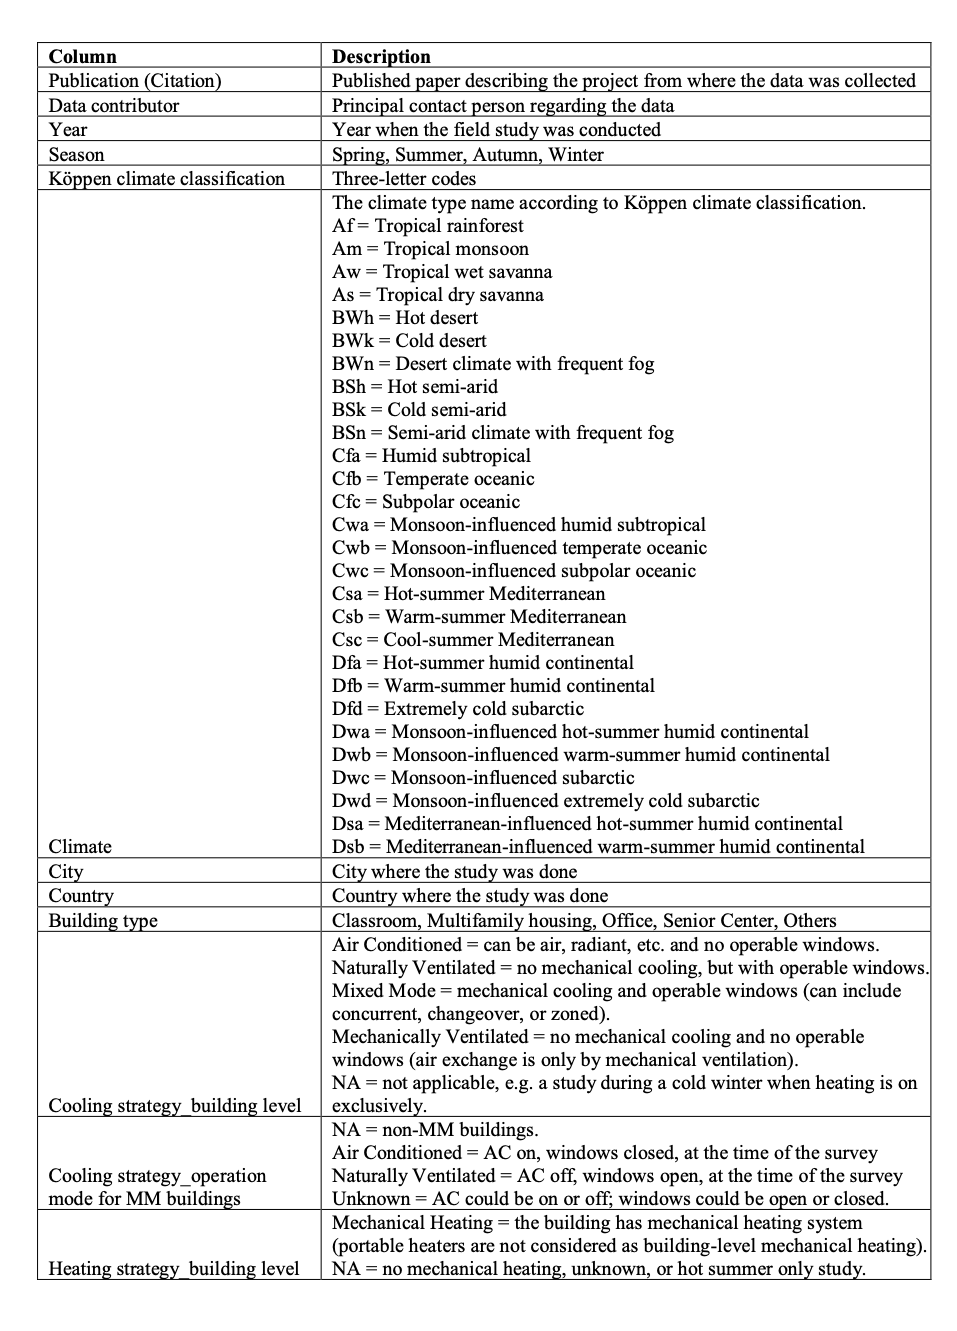

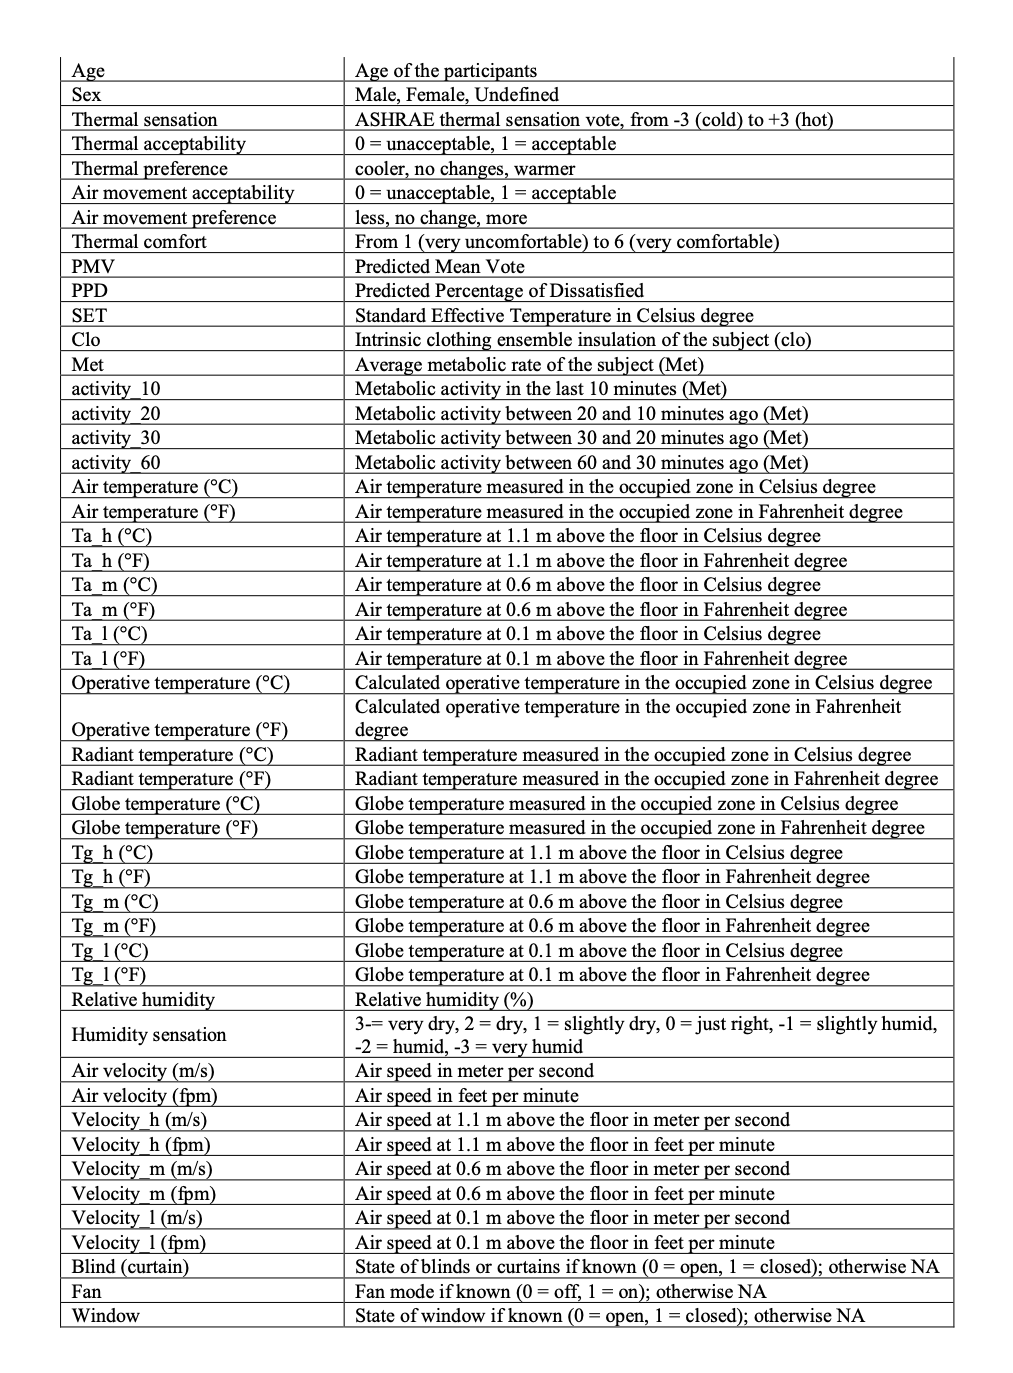

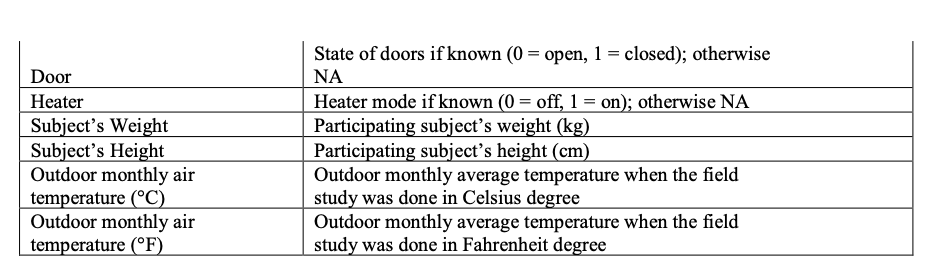

# Goal

The goal of the dataset is to obtain inquiry on thermal comfort in field settings. People are tested on how they find their thermal preference in their daily day to day basis. 

- The first letters are five main groups: A (tropical), B (dry), C (temperate), D (continental), and E (polar).
- All climates except for those in the E group are assigned a seasonal precipitation subgroup (the second letter).
- The system assigns a temperature subgroup for all groups other than those in the A group, indicated by the third letter for climates in B, C, and D, and the second letter for climates in E. For example

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
data['Country'].value_counts().plot(kind='barh', figsize=(20,6))

In [ ]:
data['Season'].value_counts()[:20].plot(kind='barh', figsize=(20,6))

There are more data in Summer/Winter than Spring/Autumn. These seasons tends to be extreme in air temperature and are tiems in which building will more likely use/change their thermal system in order to maintain a steady temperature.

In [ ]:
data['Climate'].value_counts().plot(kind='barh', figsize=(20,6))

In [ ]:
data['Building type'].value_counts().plot(kind='barh', figsize=(20,6))

In [ ]:
data['Thermal sensation'].dtypes

In [ ]:
data['Thermal sensation'].round(0).value_counts().plot(kind='barh', figsize=(20,6))

In [ ]:
data['Thermal sensation acceptability'].value_counts().plot(kind='barh', figsize=(20,6))

In [ ]:
data['Thermal preference'].value_counts().plot(kind='barh', figsize=(20,6))

In [ ]:
sns.violinplot(x = data['Thermal sensation'].round(0), y=data['Air temperature (C)'])

There is a gradual increase on thermal sensation with the Air Temperature in Celsius

## Exploring more of the subsets of data

In [ ]:
data

In [ ]:
# import matplotlib.pyplot as plt



# for col in data.columns:
#     if(data[col].dtype == 'O'):
#         data_1 = data[col].fillna('NaN')
#         unique, counts = np.unique(data_1, return_counts=True)
#         if(len(unique) < 20):  
#             size = [16,4]
#             if(len(unique)==2): 
#                 size = [16,1]
            
#             plt.figure(figsize=size)
#             plt.title(col)
#             plt.barh(unique, counts)
#             plt.grid(axis='x')
#             plt.show()

In [ ]:
# for col in data.columns:
#     if(data[col].dtype == 'float64'):
#         plt.figure(figsize=[16,5])
#         plt.title(col)
#         plt.plot(data[col])
#         plt.grid()
#         plt.show()

In [ ]:
data['Globe temperature (C)'].describe()

In [ ]:
data['Radiant temperature (C)'].describe()

In [ ]:
data['Air temperature (C)'].describe()

In [ ]:
? plotCorrelationMatrix()

In [ ]:
import matplotlib.pyplot as plt

def corr_graph(input):
    corr = input.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr_graph(data)

From the correlation matrix, we can see some of the high correlation occurs between temperature measurement. It's no surprise to see the Ta_h,Ta_m,Ta_l,Operative Temperature,Radiant Temperature and Globe Temperature, etc. It would be a good idea to remove these variables ads they would do little to the analysis.


In [ ]:
drop_col = ['Ta_h (C)','Ta_m (C)','Ta_l (C)','Operative temperature (C)','Radiant temperature (C)','Globe temperature (C)','Tg_h (C)', 'Tg_m (C)','Tg_l (C)']
data_2 = data.drop(drop_col, axis=1)

In [ ]:
corr_graph(data_2)

In the same way, I will remove activity_10 - activity_30 and Velocity_m,h,l because I want to simplifiy the data. It also seems that PMV and SET have high correlation due to the fact that SET is formed from the PMV and therefore will not provide further information and I will remove SET for this dataset.

In [ ]:
data_2.columns

In [ ]:
drop_col = ['activity_10', 'activity_20', 'activity_30', 'SET', 'Velocity_h (m/s)','Velocity_m (m/s)','Velocity_l (m/s)']
data_3 = data_2.drop(drop_col, axis=1)

In [ ]:
data_3.columns

In [ ]:
corr_graph(data_3)

There are some high correlation vlaues but our data looks a lot cleaner than it was before, this is good to start analyzing relationship

# Missing Values


Check Shape

In [ ]:
data_3.shape

In [ ]:
data_3.isna().sum()

Blind/Curtain has a large amount of missing value, that there are 101848 out of 107583. It would be better to drop missing values where the majority of data is missing and they have no impact to the data. 


Blind, an, Window, Door, Heater have too much missing value.

In [ ]:
drop_col = ['Blind (curtain)','Fan','Window','Door','Heater']
data_with_blind = data.copy()
data_4 = data_3.drop(drop_col, axis=1)

In [ ]:
data['Cooling startegy_operation mode for MM buildings'].unique()

MM buildings are also known as Mixed Mode building operation. Mixed mode is a hybrid space conditioning method that uses natural ventilation from window and mechanical refrigeration system. Mixed mode is only one of many style of space system, which explains why we have a lot of missing data. We don't have to drop it, but we certainly can't keep it, so if we were to do analysis on only MM_building, we would need to store it somewhere else.

In [ ]:
MM_data = data_4[data_4['Cooling startegy_operation mode for MM buildings'].isna() == False]

In [ ]:
MM_data['Cooling startegy_operation mode for MM buildings'].isna().sum()

In [ ]:
data_no_MM = data.drop('Cooling startegy_operation mode for MM buildings', axis=1)

In [ ]:
data_no_MM.columns

In [ ]:
data_4.isna().sum()

There is more cleaning to do, but because some of the variable are subject to different experiment, I'll leave it here and work on a subset of data

In [ ]:
data_simplified = data_4.copy()

# Looking at a subset of data

I will look at Thermal sensation, Thermal sensation acceptability and Thermal preference to understand the difference between these 3 varaibles

In [ ]:
data_simplified['Thermal sensation'].round(0).value_counts()

Thermal sensation acceptability asks: "Do you want the thermal condition to change?"

In [ ]:
data_simplified['Thermal sensation acceptability'].value_counts()

In [ ]:
data_simplified['Thermal preference'].value_counts()

Thermal sensation acceptability is a variable that counts whether people would want the temperature to change. 1 indicates yes and 0 indicates no

In [ ]:
thermal_accept_data = data_simplified[data_simplified['Thermal sensation acceptability'] == 1.0]
thermal_accept_data.shape

In [ ]:
thermal_change_data = data_simplified[data_simplified['Thermal sensation acceptability'] == 0.0]
thermal_change_data.shape

In [ ]:
sns.distplot(thermal_accept_data['Air temperature (C)'])

In [ ]:
sns.distplot(thermal_change_data['Air temperature (C)'])

Generally speaking, people who wants a change have the same distribution as people who do not. There aren't a lot of insight to be gained here, so maybe we have to look at other variables, such as Climate.

In [ ]:
data_simplified['Climate'].value_counts()

I'm now looking at two subset of climate : Hot-summer Mediterannean and Cold-semi arid to see the difference between thermal sensation in the two climate. (Hoping to see major difference). Note that Cold semi arid have little data in comaprison with hot summer

In [ ]:
hot_summer_data = data_simplified[data_simplified['Climate'] == 'Hot-summer Mediterranean']
cold_arid_data = data_simplified[data_simplified['Climate'] == 'Cold semi-arid']

In [ ]:
sns.distplot(hot_summer_data['Thermal sensation'].round(0))

In [ ]:
sns.distplot(cold_arid_data['Thermal sensation'].round(0))

There are more varaibles to explore, it seems that there isn't a lot of connection made yet.